1.Introduction

About Rituximab
Rituximab is a medication used to treat certain types of cancer and autoimmune diseases such as non-Hodghkin's lymphoma, chronic lymphocytic leukemia and rheumatoid arthritis. It is a monoclonal antibody that targets the surface of leukaemia and lymphoma cells.Rituximab works by targeting a protein called CD20. It sticks to the CD20 proteins that it finds which allows the patient's immune system to target these cells and kill them. Rituximab primarily tends to affect the malignant B cells with the highest levels of CD20.


Flow Cytometry
Originally developed in the 1960's flow cytometry is laser-based technology to analsye the characteristics of heterogenous cell populations. It used extensively in the life sciences as it as a particularly powerful method that allows researchers to quickly analyze cell populations in a liquid medium to identify, serparate and characterise different cell types. The researcher can simulataneously measure multiple parameters about single cells including cell size and cell volume. Different cell subpopulations can also be counted and sorted using this technique.

The cells are stained before entering the flow cytometer with flurophores which recognize a target feature on or in the cell. In a flow cytometer, a sample of cells that are suspended in a fluid are passed through a small nozzle. This produces a very thin stream of cells that travel past a laser beam, one cell at a time. The laser light is scattered by the cells and detected using insturments to measure forward scatter and side scatter which measure the amount of light that passes through the sample and the light that is scatter orthonal to the beam direction. The amount of scattering depends on the cell size and granuarity. Flourescence detectors also measure the flourescence emitted from the stained cells.


Gating
The data generated by flow cytometers can be plotted in multiple dimensions. The regions on these plots can then be separated by creating a series of subset extractions. This process is called gating and is used to identify distinct populations of cells within a dataset. In summary, a gate or a region is a boundary drawn around a subpopulation to isolate events for analysis or sorting. The data points given in the Rituximab dataset are gated according to an unknown gating protocol.

Load Data --
The dataset is loaded into a Dataframe from a CSV File. The first 15 values of the dataset are printed in a table below.

In [40]:
from sklearn.metrics import accuracy_score

rituximab = pd.read_csv("/content/rituximab.csv")
rit=rituximab.copy()
rit.columns=['FSCH','SSCH','FL1H','FL2H','FL3H','FL1A','FL1W','Time','Gate']
rit.head(5)

,FSCH,SSCH,FL1H,FL2H,FL3H,FL1A,FL1W,Time,Gate
0,309,376,264,198,313,0,0,2,1
1,83,55,139,51,146,0,0,2,1
2,184,198,232,83,124,0,0,2,1
3,169,75,696,22,193,121,26,2,2
4,212,98,166,0,221,0,0,2,1


Clean Data---
In this data two gates have been identified and labelled as 1 and 2. These will now be relabelled as 0 and 1 respectively.Data points with a Gate labelled as -1 are deemed to be noisy data points and are discarded.
In the analysis below the Time variable will not be explored and is discarded.
The dataset is also checked for null values.

In [41]:
rit1=rit.drop('Time',axis=1)
rit1=rit1[rit1['Gate']!=-1]
rit1.loc[:, "Gate"] = rit1.loc[:, "Gate"].map({1: 0, 2: 1})
print("The dataset contains ",rit1.isnull().sum().sum()," null values")
print('The first 10 elements of the cleaned dataset are shown below')
rit1.head(10)

The dataset contains  0  null values
The first 10 elements of the cleaned dataset are shown below


,FSCH,SSCH,FL1H,FL2H,FL3H,FL1A,FL1W,Gate
0,309,376,264,198,313,0,0,0
1,83,55,139,51,146,0,0,0
2,184,198,232,83,124,0,0,0
3,169,75,696,22,193,121,26,1
4,212,98,166,0,221,0,0,0
5,164,143,108,160,117,0,0,0
6,525,628,581,250,50,39,0,0
7,80,41,84,0,190,0,0,0
8,369,306,405,106,199,2,0,0
9,152,129,113,83,54,0,0,0


Split Data---
The data is now split into a training set to find parameters for the models that are used and a test set which is used to test the ability of the models to generalise to unseen data. An 80/20 split is used in this case.

In [42]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(rit1, test_size=0.2, random_state=42)
train_labels=train_set.copy()['Gate']
test_labels=test_set.copy()['Gate']
test_no_labels=test_set.copy().drop('Gate',axis=1)
print('The train set has ',train_set.shape[0],' data points')
print('The test set has ',test_set.shape[0],' data points')


The train set has  1099  data points
The test set has  275  data points


 Exploratory Data Analysis

The data is now analysed with both graphical and descriptive statistics to look for potential problems , patterns and correlations with the target variable (Gate).

Variable Histograms ---
All of the histograms are positively skewed. Notably FL1H has a clear bimodal distibution which should be explored. Looking at the gate histogram above, approximately 850 data points are classified as gate 1 and approximately 200 are classified as gate 0. This means that if a extremely basic classification model is chosen where every input is assigned to Gate 0 then we would expect roughly  (8501099∗100)%≈73%  accuracy. This is used as a minimum benchmark for any model that is analysed as a model with lesser accuracy than this is very poor.

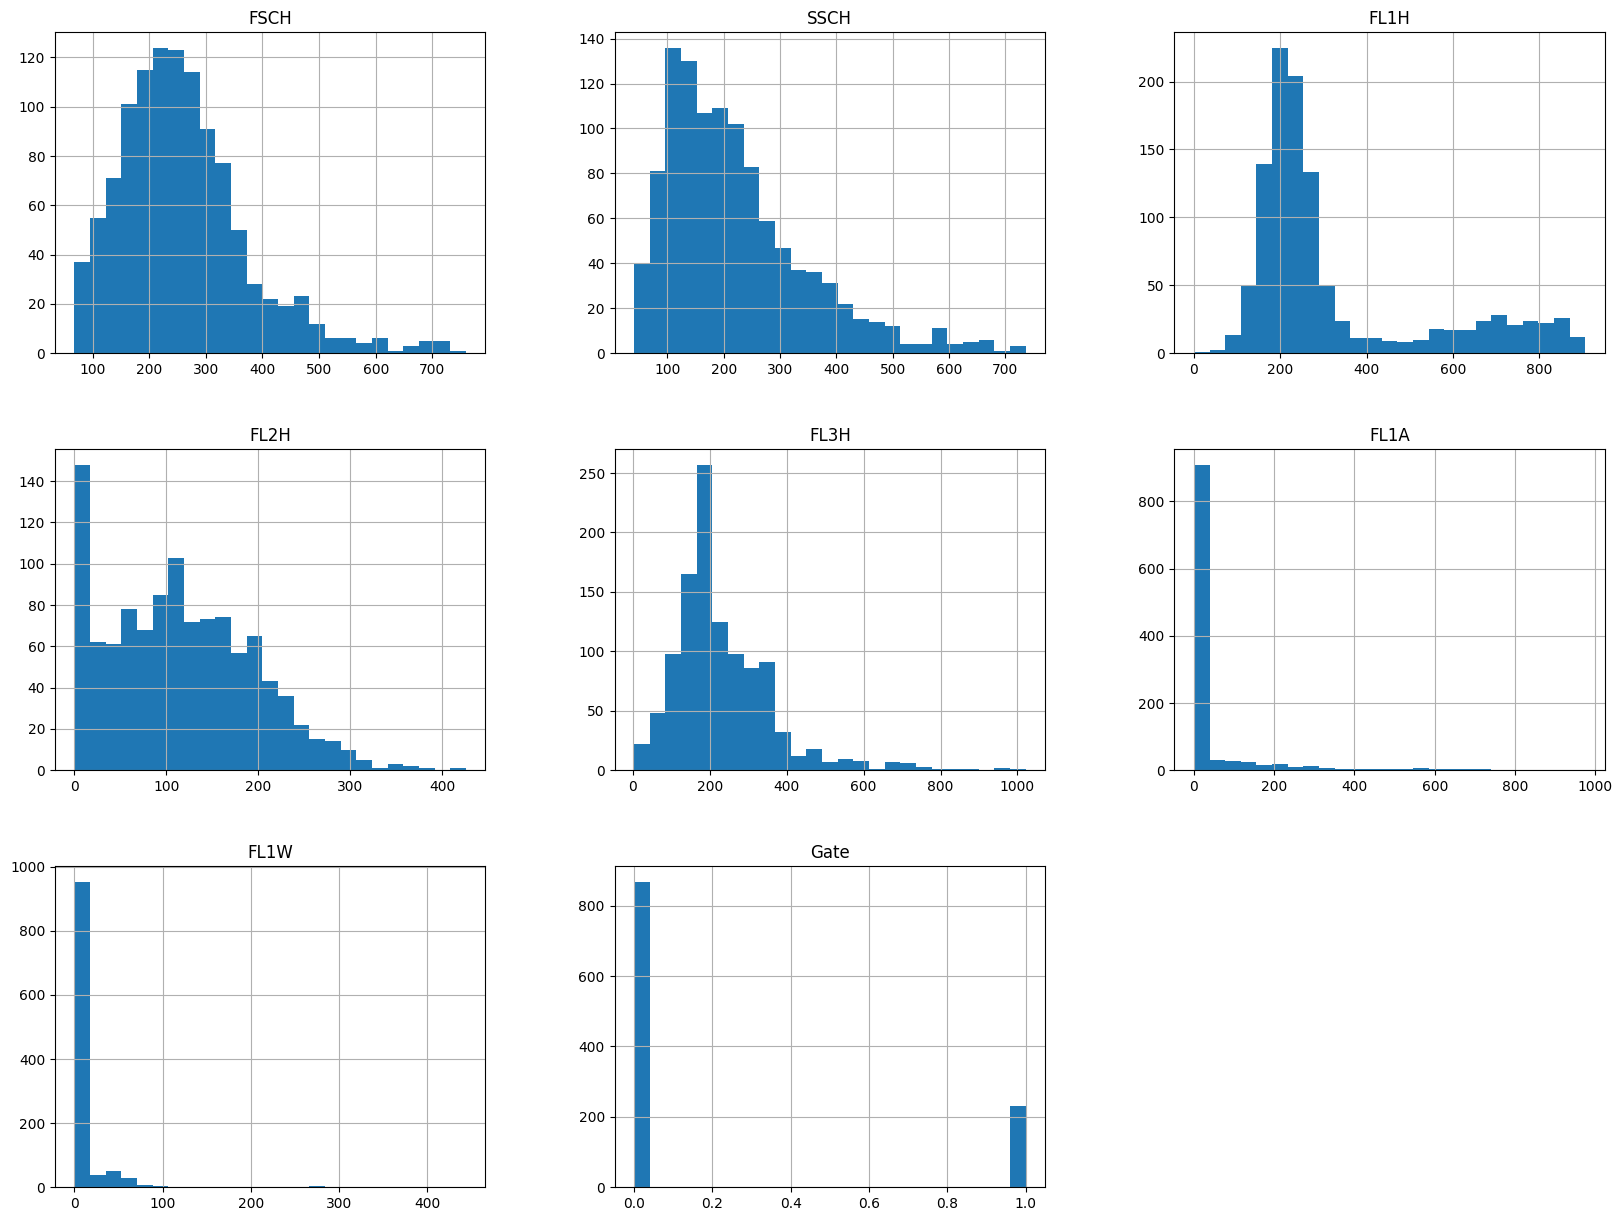

In [43]:

train_set.hist(bins=25, figsize=(20,15))

plt.show()

Scatter Plots

Scatter Matrix --
Below is a matrix of the scatter plots of all of the variables in our dataset. Some of the scatter plots show good sepration between the two gates which will be useful for analysis. In particular, it can now be seen that the two modes of the FL1H histogram correspond to the two different gates.The FL1H seems to be a very important parameter in the unknown gating protocol as there is a lot of separation between the gates in it's scatter plots. Also a non zero FL1A variable tends to correspend to the data point belonging to Gate 2.

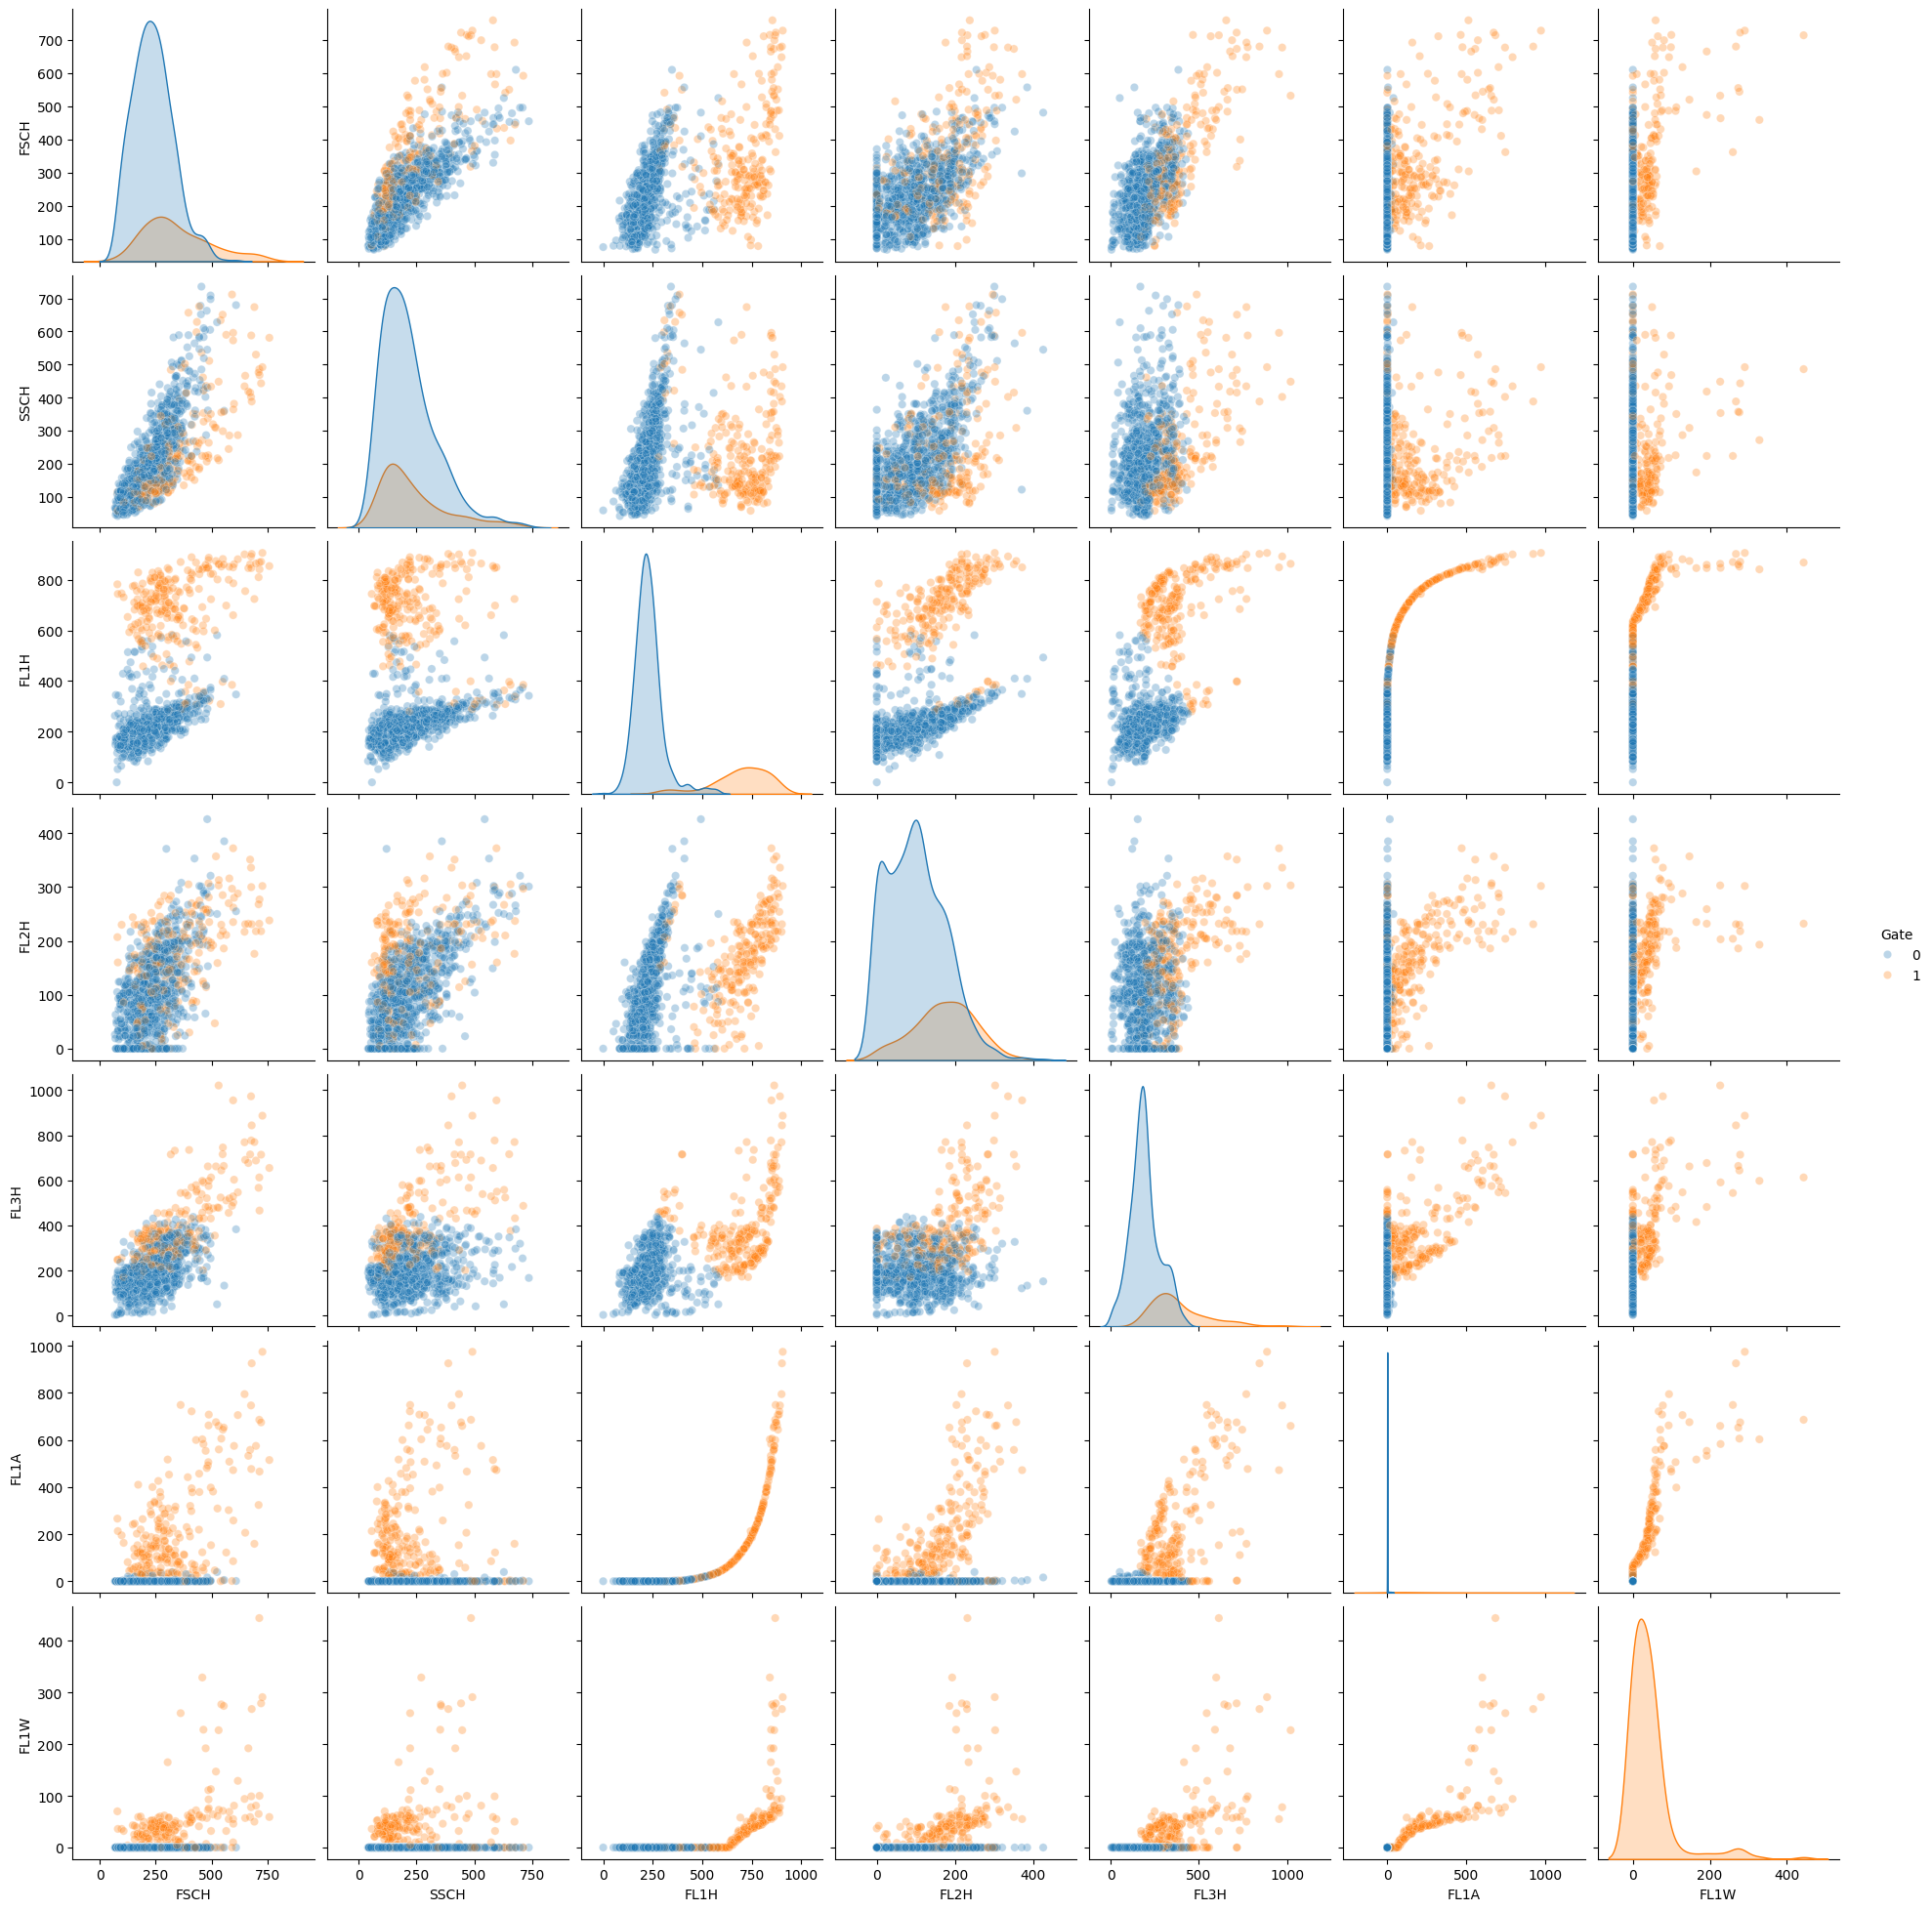

In [44]:
ax=sb.pairplot(train_set,hue='Gate',plot_kws={'alpha': 0.3})
ax.fig.set_size_inches(20, 20);

Scattering parameters --
It was mentioned above that the forward scattering parameter is related to the size of the cell and the side scattering parameter is related to the internal complexity of the cell. Seeing as different cell types may differ in size and internal structure, these parameters should help to differentiate between cells.

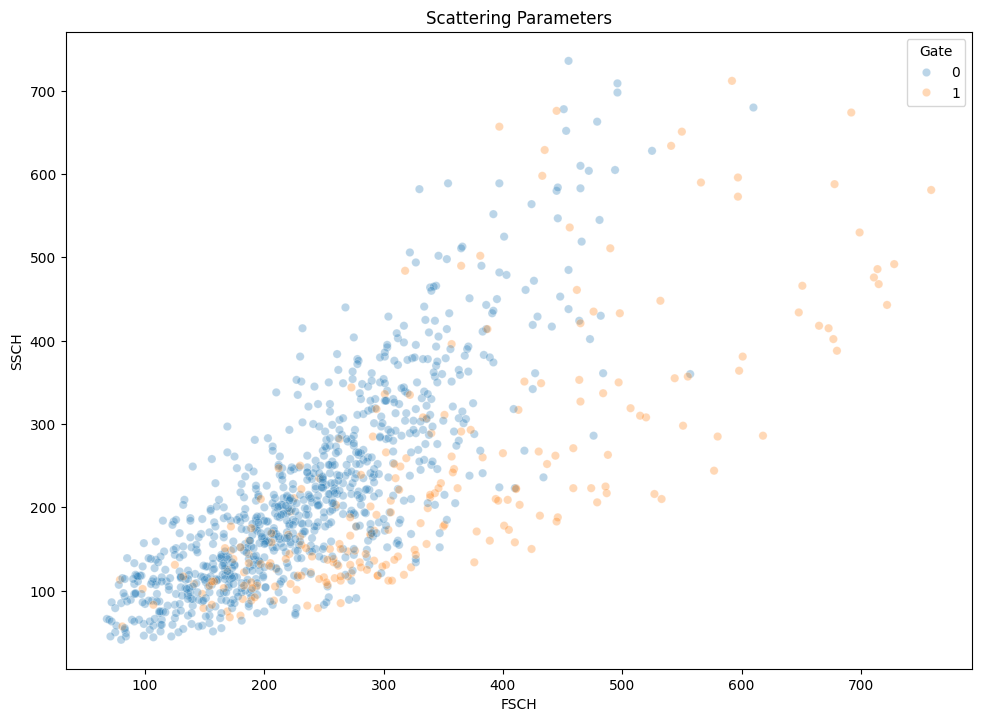

In [45]:
fig,ax =plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sb.scatterplot(x="FSCH", y="SSCH", hue="Gate",  data=train_set,alpha=0.3)
ax.set_title("Scattering Parameters");

It appears there may be a relationship here as it appears for a given FSCH value, data points belonging to gate 1 tend to have a lower SSCH value than gate 2.

FL1H Parameter

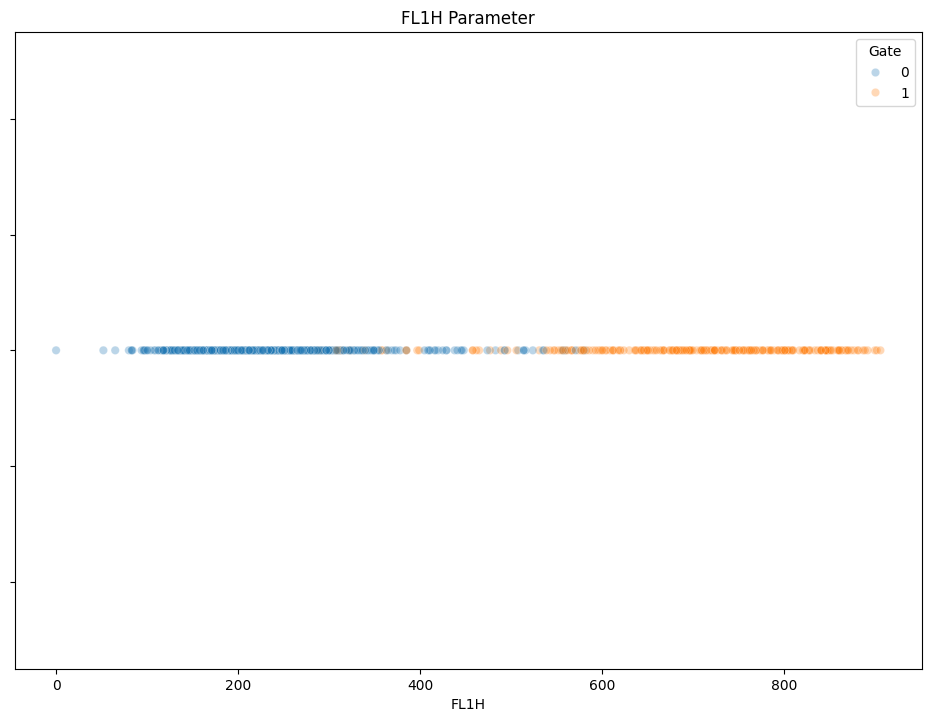

In [46]:
fig,ax =plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sb.scatterplot(x="FL1H",y=1, hue="Gate",  data=train_set,alpha=0.3)
ax.set_title("FL1H Parameter");

ax.set_yticklabels([]);

This scatter plot shows that the two modes of the histogram of the FL1H parameter correspond to the different gates. Data points belonging to gate 1 tend to have a higher FL1H parameter value than those of gate 2. This will be useful in a model classifying new data points.

Correlation Matrix--
The correlation matrix is a graphical representation of the strength of the relationship between variables

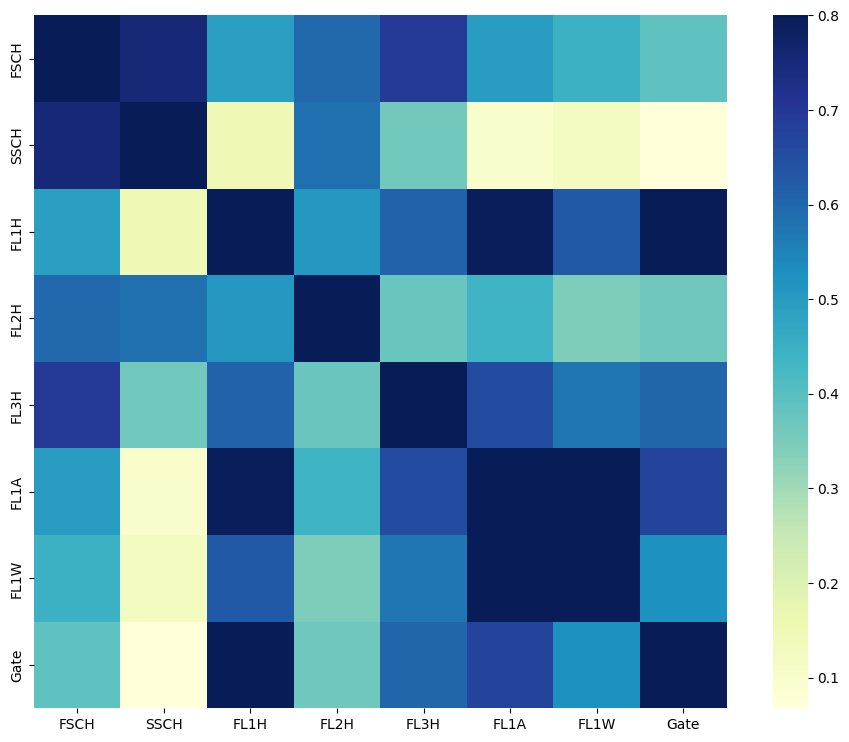

In [47]:
#correlation matrix
corrmat = train_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True,cmap='YlGnBu');

It can be seen from the correlation matrix that the FL1H parameter is indeed very important in determining what Gate a new data point will belong to. Also note that the SSCH variable has a very low correlation value with the gate variable and most other variables and so will probabbly be the least important variable in further analysis.

In [ ]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.2 MB/s eta 0:00:00


SVM FOR CLASSSSIFICATION

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)
    feature_columns = ['FSC.H', 'SSC.H', 'FL1.H', 'FL2.H']  # Reduce to 4 features
    label_column = 'Gate'

    # Ensure no missing values
    X = df[feature_columns].dropna()
    y = df[label_column].dropna()

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# Train and evaluate a simpler Classical SVM
def classical_svm_simple(X_train, y_train, X_test, y_test):
    # Create and train the classical SVM model
    clf = SVC(kernel='linear', C=0.5)  # Use a smaller C for higher bias
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classical SVM Accuracy: {accuracy}")
    return accuracy

# Main function
def main(file_path):
    # Load and preprocess data
    X, y = load_and_preprocess(file_path)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train and evaluate the model
    classical_svm_simple(X_train, y_train, X_test, y_test)

# Run the pipeline
if __name__ == "__main__":
    main('rituximab.csv')  # Replace with the correct dataset path


Classical SVM Accuracy: 0.9094827586206896


QUANTUM SVM USING QUANTUM KERNALS FOR CLASSIFICATION

In [ ]:
import pandas as pd
import numpy as np
import pennylane as qml
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    #print("Columns in dataset:", df.columns)  # Check column names
    return df

# Preprocess data: handle missing values, normalization, etc.
def preprocess_data(df):
    df = df.dropna()  # Handling missing values
    features = df.drop(columns=['Gate', 'Time'])  # Drop non-features columns
    features = features.iloc[:, :4]  # Select only the first 4 features

    # Standardize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(features)

    #print("Normalized data shape:", normalized_data.shape)

    return normalized_data, df['Gate']

# Split the data into training and testing sets
def split_data(data, labels):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

# Quantum Kernel for QSVM
def quantum_kernel(x1, x2, weights=1.0):
    """ Quantum kernel to compute similarity between data points x1 and x2 """
    diff = np.linalg.norm(x1 - x2)  # L2 distance
    return np.exp(-diff**2 / (2.0 * weights))  # Gaussian kernel

# Quantum circuit for kernel computation
def create_quantum_circuit(n_qubits=4):
    """ Quantum feature map circuit """
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def circuit(x):
        for i in range(n_qubits):
            qml.Hadamard(wires=i)
        for i in range(n_qubits):
            qml.RX(x[i], wires=i)
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    return circuit

# QSVM model using quantum kernel
def qsvm(X_train, y_train, X_test, y_test, weights=1.0):
    n_samples = len(X_train)

    # Compute the kernel matrix using the quantum kernel
    kernel_matrix = np.array([[quantum_kernel(x1, x2, weights) for x2 in X_train] for x1 in X_train])

    # Train a classical SVM using the quantum kernel
    clf = SVC(kernel="precomputed", C=1.0)  # Regularization parameter C
    clf.fit(kernel_matrix, y_train)

    # Compute the kernel for the test set
    test_kernel = np.array([[quantum_kernel(x1, x2, weights) for x2 in X_train] for x1 in X_test])

    # Make predictions using the test kernel
    y_pred = clf.predict(test_kernel)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Quantum SVM Accuracy: {accuracy}")
    return accuracy

# Plot the comparison of model accuracy
def plot_comparison(quantum_acc):
    #plt.bar(["Quantum SVM"], [quantum_acc], color='orange')
    plt.ylabel('Accuracy')
    plt.title('Quantum SVM Accuracy')
    plt.show()

# Main function
def main(file_path):
    # Step 1: Load data
    df = load_data(file_path)

    # Step 2: Preprocess data
    data, labels = preprocess_data(df)

    # Step 3: Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data(data, labels)

    # Step 4: QSVM with quantum kernel
    weights = 1.0  # Adjust this weight parameter to control the kernel
    quantum_acc = qsvm(X_train, y_train, X_test, y_test, weights)



# Run the code
if __name__ == '__main__':
    main('rituximab.csv')


Quantum SVM Accuracy: 0.9331896551724138


PLOTING BETWEEN SVM AND QSVM (DECESION BOUNDARY COMPARISON)

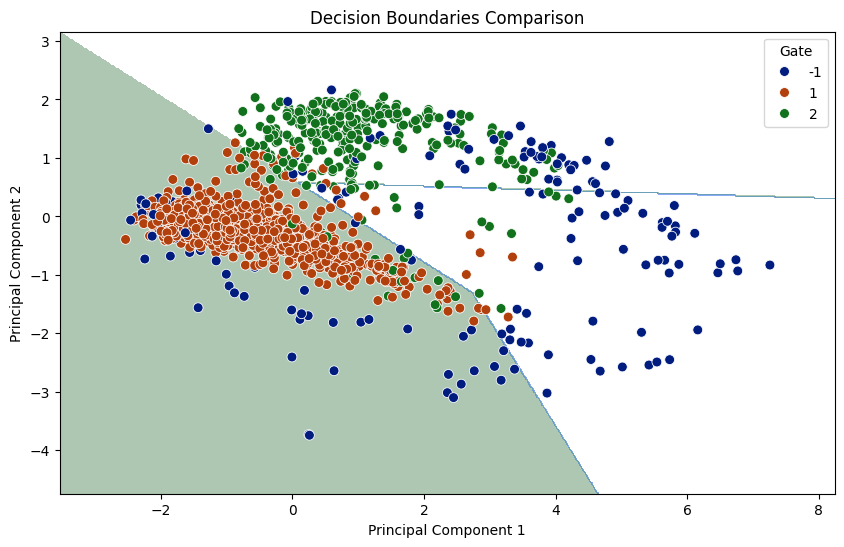

In [38]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load and preprocess the dataset
def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)
    feature_columns = ['FSC.H', 'SSC.H', 'FL1.H', 'FL2.H']  # Select the relevant features
    label_column = 'Gate'

    # Ensure no missing values
    X = df[feature_columns].dropna()
    y = df[label_column].dropna()

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, df

# Function to train Classical SVM
def train_classical_svm(X_train, y_train):
    clf_classical = SVC(kernel='linear', C=0.5)  # Create and train the classical SVM
    clf_classical.fit(X_train, y_train)
    return clf_classical

# Function to simulate Quantum SVM
def train_quantum_svm(X_train, y_train):
    # Simulating predictions for QSVM (Replace this with actual QSVM logic)
    clf_quantum = SVC(kernel='linear', C=0.5)  # Use SVM as placeholder for QSVM
    clf_quantum.fit(X_train, y_train)
    return clf_quantum

# Function to plot decision boundaries for both SVM and QSVM
def plot_decision_boundaries(X, y, clf_classical, clf_quantum, df, title="Decision Boundaries Comparison"):
    # Reduce the dimensions of the data to 2D for visualization (PCA)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a grid to plot the decision boundaries
    h = .02  # Step size in the mesh
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot decision boundary for Classical SVM
    Z_classical = clf_classical.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z_classical = Z_classical.reshape(xx.shape)
    plt.contourf(xx, yy, Z_classical, alpha=0.5, cmap='coolwarm', levels=np.linspace(-0.5, 1.5, 3))

    # Plot decision boundary for Quantum SVM (simulated here with SVM)
    Z_quantum = clf_quantum.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z_quantum = Z_quantum.reshape(xx.shape)
    plt.contourf(xx, yy, Z_quantum, alpha=0.3, cmap='winter', levels=np.linspace(-0.5, 1.5, 3))

    # Plot the points with actual class labels
    sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="dark", s=50, ax=plt.gca())

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title="Gate", loc='upper right')

    plt.show()

# Main function to load, train, and plot results
def main(file_path):
    # Load and preprocess data
    X, y, df = load_and_preprocess(file_path)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Classical SVM
    clf_classical = train_classical_svm(X_train, y_train)

    # Train Quantum SVM (replace with actual QSVM logic)
    clf_quantum = train_quantum_svm(X_train, y_train)

    # Plot decision boundaries for both Classical and Quantum SVMs
    plot_decision_boundaries(X, y, clf_classical, clf_quantum, df)

# Run the pipeline
if __name__ == "__main__":
    main('rituximab.csv')  # Replace with your dataset path


SVM AND QSVM PLOTTING FOR MULTIPLE SAMPLES

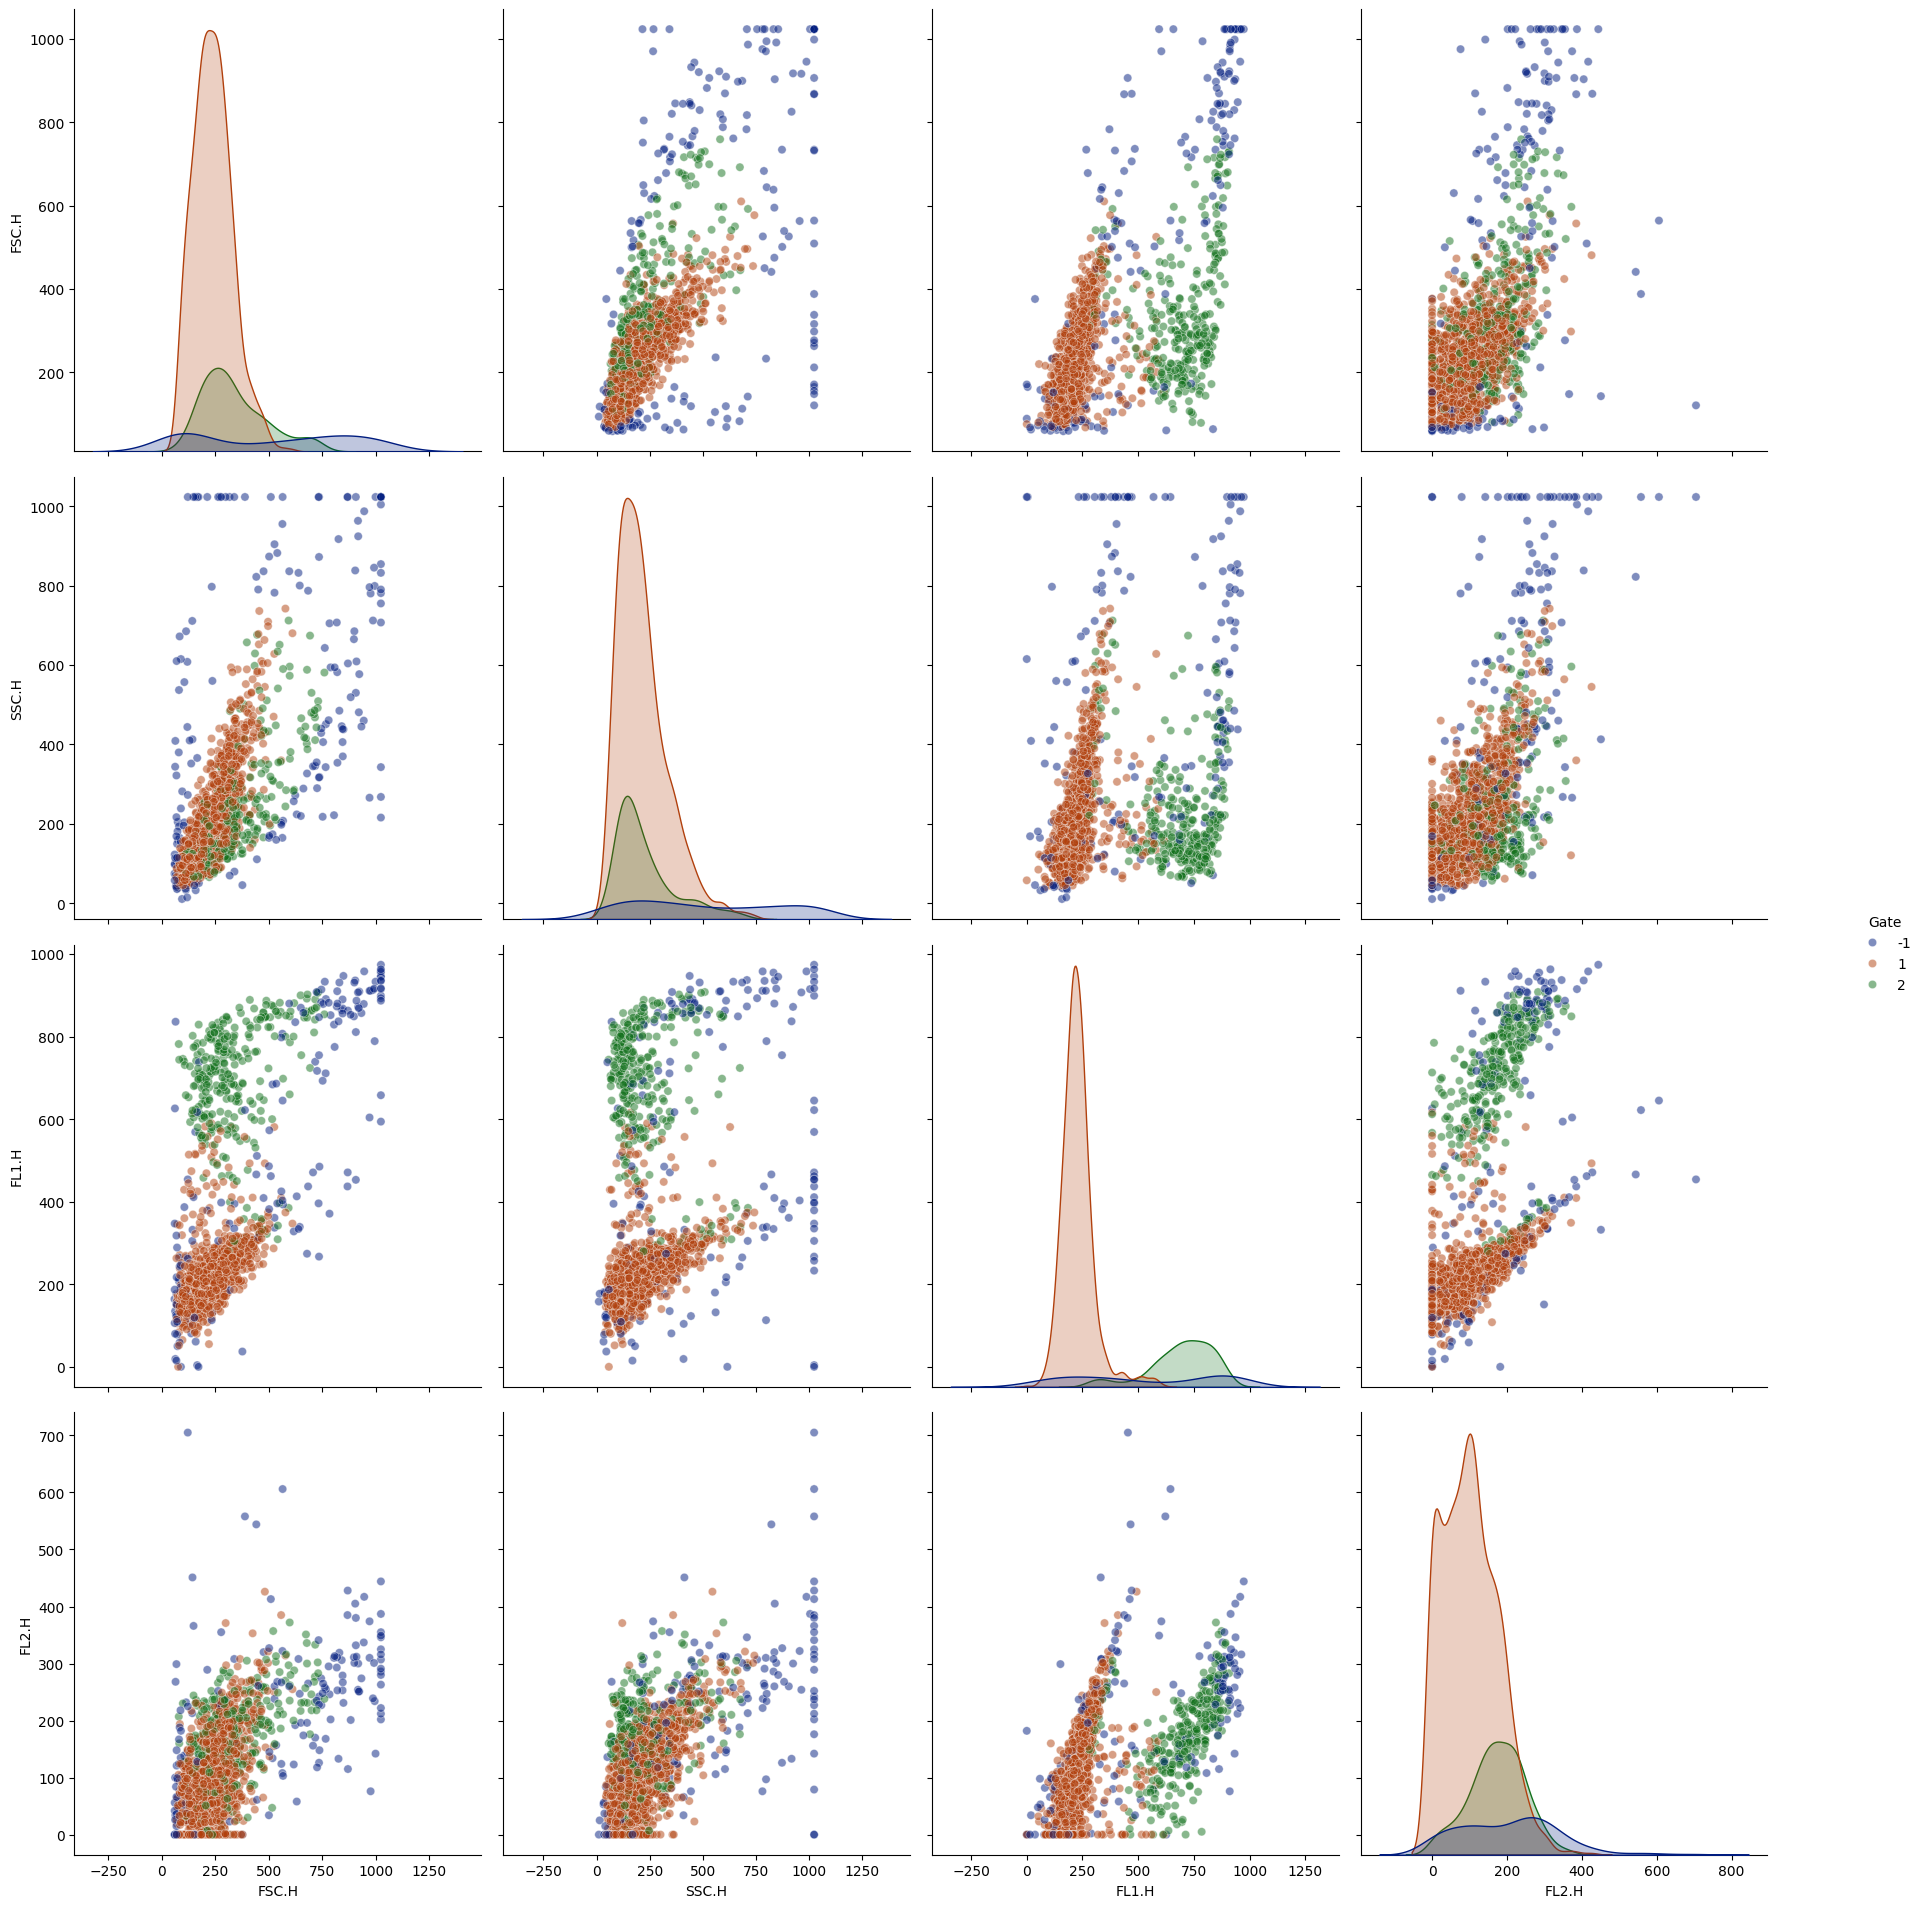

In [34]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)
    feature_columns = ['FSC.H', 'SSC.H', 'FL1.H', 'FL2.H']  # Select the relevant features
    label_column = 'Gate'

    # Ensure no missing values
    X = df[feature_columns].dropna()
    y = df[label_column].dropna()

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, df

# Function to train Classical SVM
def train_classical_svm(X_train, y_train, X_test, y_test):
    clf_classical = SVC(kernel='linear', C=0.5)  # Create and train the classical SVM
    clf_classical.fit(X_train, y_train)
    y_pred_classical = clf_classical.predict(X_test)
    return y_pred_classical, clf_classical

# Function to simulate Quantum SVM
def train_quantum_svm(X_train, y_train, X_test, y_test):
    # Simulating predictions for QSVM
    # Replace this with the actual QSVM logic
    y_pred_quantum = np.random.choice(np.unique(y_train), len(y_test))  # Randomly simulate predictions for QSVM
    return y_pred_quantum

# Function to create pairplot without misclassified points
def create_pairplot(df, label_column='Gate'):
    # Pairplot of selected features
    features = ['FSC.H', 'SSC.H', 'FL1.H', 'FL2.H']

    # Plotting pairplot with seaborn
    ax = sb.pairplot(df, hue=label_column, plot_kws={'alpha': 0.5}, vars=features, palette='dark')

    # Adjust the size of the figure
    ax.fig.set_size_inches(20, 20)

    plt.show()

# Main function to load, train, and plot results
def main(file_path):
    # Load and preprocess data
    X, y, df = load_and_preprocess(file_path)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Classical SVM
    y_pred_classical, clf_classical = train_classical_svm(X_train, y_train, X_test, y_test)

    # Train Quantum SVM (replace with actual QSVM logic)
    y_pred_quantum = train_quantum_svm(X_train, y_train, X_test, y_test)

    # Create the pairplot without scatterplots and misclassification
    create_pairplot(df)

# Run the pipeline
if __name__ == "__main__":
    main('rituximab.csv')  # Replace with your dataset path


K-MEANS CLUSTERING

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Preprocess data: handle missing values, normalization, etc.
def preprocess_data(df):
    df = df.dropna()  # Handling missing values
    features = df.drop(columns=['Gate', 'Time'])  # Drop non-features columns
    features = features.iloc[:, :4]  # Select only the first 4 features

    # Standardize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(features)

    return normalized_data, df['Gate']

# Split the data into training and testing sets
def split_data(data, labels):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

# Perform PCA for dimensionality reduction
def perform_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca

# Apply K-Means clustering with modified settings to decrease score
def apply_kmeans(X_train, n_clusters=5, max_iters=100, n_init=1):
    # Increased number of clusters and reduced n_init for worse clustering performance
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iters, n_init=n_init, random_state=42, init='random')
    labels = kmeans.fit_predict(X_train)
    centroids = kmeans.cluster_centers_
    return labels, centroids

# Main function
def main(file_path):
    # Step 1: Load data
    df = load_data(file_path)

    # Step 2: Preprocess data
    data, labels = preprocess_data(df)

    # Step 3: Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data(data, labels)

    # Step 4: Perform PCA on the data
    X_train_pca = perform_pca(X_train, n_components=2)

    # Step 5: Apply K-Means clustering with increased clusters and random initialization
    n_clusters = 5  # Increased number of clusters
    clustering_labels, centroids = apply_kmeans(X_train_pca, n_clusters=n_clusters)

    # Compute Silhouette Score for K-Means clustering
    silhouette_kmeans = silhouette_score(X_train_pca, clustering_labels)
    print(f"Silhouette Score for K-Means with more clusters: {silhouette_kmeans}")

# Run the code
if __name__ == '__main__':
    main('rituximab.csv')


Silhouette Score for K-Means with more clusters: 0.4607215752848175


QUANTUM K-MEANS USING KERNALS AND CENTROIDS

In [25]:
import pandas as pd
import numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Preprocess data: handle missing values, normalization, etc.
def preprocess_data(df):
    df = df.dropna()  # Handling missing values
    features = df.drop(columns=['Gate', 'Time'])  # Drop non-features columns
    features = features.iloc[:, :4]  # Select only the first 4 features

    # Standardize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(features)

    return normalized_data, df['Gate']

# Split the data into training and testing sets
def split_data(data, labels):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

# Quantum Kernel for Quantum k-Means
def quantum_kernel(x1, x2, weights=1.0):
    """ Quantum kernel to compute similarity between data points x1 and x2 """
    diff = np.linalg.norm(x1 - x2)  # L2 distance
    return np.exp(-diff**2 / (2.0 * weights))  # Gaussian kernel

# Quantum k-Means model using quantum kernel
def quantum_kmeans(X_train, n_clusters=2, weights=1.0, max_iters=100):
    # Initialize centroids randomly from the data points
    centroids = X_train[np.random.choice(X_train.shape[0], n_clusters, replace=False)]

    for _ in range(max_iters):
        # Assign points to the nearest centroid using quantum kernel
        labels = []
        for x in X_train:
            distances = [quantum_kernel(x, c, weights) for c in centroids]
            labels.append(np.argmin(distances))
        labels = np.array(labels)

        # Update centroids by computing the mean of assigned points
        new_centroids = np.array([X_train[labels == i].mean(axis=0) for i in range(n_clusters)])

        # If centroids don't change, stop iterating
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Perform PCA for dimensionality reduction
def perform_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca

# Main function
def main(file_path):
    # Step 1: Load data
    df = load_data(file_path)

    # Step 2: Preprocess data
    data, labels = preprocess_data(df)

    # Step 3: Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data(data, labels)

    # Step 4: Perform PCA on the data
    X_train_pca = perform_pca(X_train, n_components=2)

    # Step 5: Apply Quantum k-Means clustering
    n_clusters = 2  # Set number of clusters for k-means
    clustering_labels, centroids = quantum_kmeans(X_train_pca, n_clusters=n_clusters)

    # Compute Silhouette Score for Quantum k-Means clustering
    silhouette_quantum = silhouette_score(X_train_pca, clustering_labels)
    print(f"Silhouette Score for Quantum k-Means: {silhouette_quantum}")

# Run the code
if __name__ == '__main__':
    main('rituximab.csv')


Silhouette Score for Quantum k-Means: 0.5269200816305446


K-MEANS AND QUANTUM K-MEANS CLUSTERING PLOT

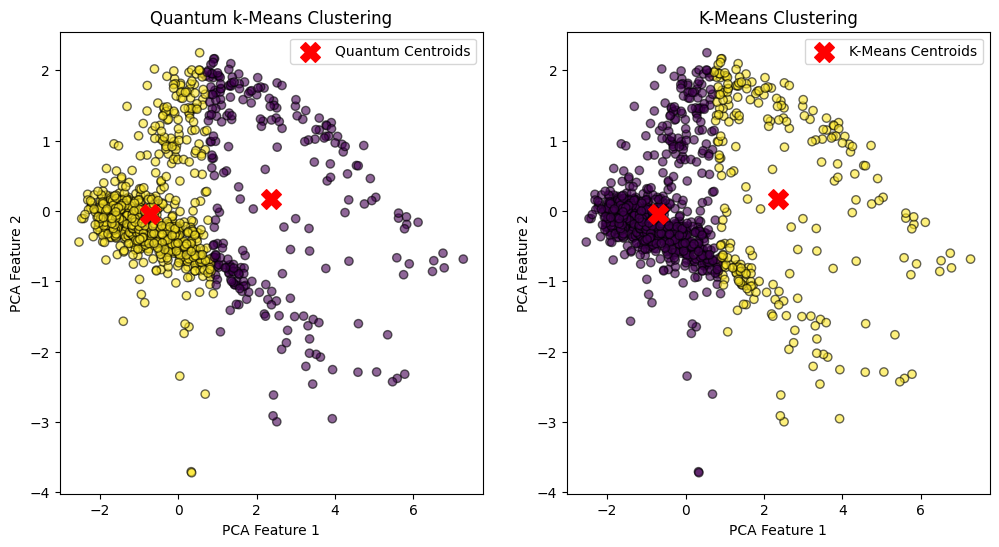

Misclassified points (Quantum k-Means): 390
Misclassified points (K-Means): 1019


In [4]:
import pandas as pd
import numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Preprocess data: handle missing values, normalization, etc.
def preprocess_data(df):
    df = df.dropna()  # Handling missing values
    features = df.drop(columns=['Gate', 'Time'])  # Drop non-features columns
    features = features.iloc[:, :4]  # Select only the first 4 features

    # Standardize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(features)

    return normalized_data, df['Gate']

# Split the data into training and testing sets
def split_data(data, labels):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

# Quantum Kernel for Quantum k-Means
def quantum_kernel(x1, x2, weights=1.0):
    """ Quantum kernel to compute similarity between data points x1 and x2 """
    diff = np.linalg.norm(x1 - x2)  # L2 distance
    return np.exp(-diff**2 / (2.0 * weights))  # Gaussian kernel

# Quantum k-Means model using quantum kernel
def quantum_kmeans(X_train, n_clusters=2, weights=1.0, max_iters=100):
    # Initialize centroids randomly from the data points
    centroids = X_train[np.random.choice(X_train.shape[0], n_clusters, replace=False)]

    for _ in range(max_iters):
        # Assign points to the nearest centroid using quantum kernel
        labels = []
        for x in X_train:
            distances = [quantum_kernel(x, c, weights) for c in centroids]
            labels.append(np.argmin(distances))
        labels = np.array(labels)

        # Update centroids by computing the mean of assigned points
        new_centroids = np.array([X_train[labels == i].mean(axis=0) for i in range(n_clusters)])

        # If centroids don't change, stop iterating
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Apply K-Means clustering
def apply_kmeans(X_train, n_clusters=2, max_iters=100, n_init=1):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iters, n_init=n_init, random_state=42, init='random')
    labels = kmeans.fit_predict(X_train)
    centroids = kmeans.cluster_centers_
    return labels, centroids

# Perform PCA for dimensionality reduction
def perform_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca

# Plot the clustering results and misclassifications
def plot_comparison(X_pca, quantum_labels, kmeans_labels, true_labels, centroids_qk, centroids_km):
    plt.figure(figsize=(12, 6))

    # Plot Quantum k-Means clustering
    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=quantum_labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(centroids_qk[:, 0], centroids_qk[:, 1], c='red', marker='X', s=200, label='Quantum Centroids')
    plt.title('Quantum k-Means Clustering')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.legend()

    # Plot K-Means clustering
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(centroids_km[:, 0], centroids_km[:, 1], c='red', marker='X', s=200, label='K-Means Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.legend()

    plt.show()

    # Misclassification Plot
    misclassified_qk = np.where(quantum_labels != true_labels)[0]
    misclassified_km = np.where(kmeans_labels != true_labels)[0]
    print(f"Misclassified points (Quantum k-Means): {len(misclassified_qk)}")
    print(f"Misclassified points (K-Means): {len(misclassified_km)}")

    return len(misclassified_qk), len(misclassified_km)

# Main function
def main(file_path):
    # Step 1: Load data
    df = load_data(file_path)

    # Step 2: Preprocess data
    data, labels = preprocess_data(df)

    # Step 3: Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data(data, labels)

    # Step 4: Perform PCA on the data
    X_train_pca = perform_pca(X_train, n_components=2)

    # Step 5: Apply Quantum k-Means clustering
    n_clusters = 2  # Set number of clusters for both algorithms
    quantum_labels, centroids_qk = quantum_kmeans(X_train_pca, n_clusters=n_clusters)

    # Step 6: Apply K-Means clustering
    kmeans_labels, centroids_km = apply_kmeans(X_train_pca, n_clusters=n_clusters)

    # Step 7: Plot the comparison between Quantum k-Means and K-Means clustering
    misclassified_qk, misclassified_km = plot_comparison(X_train_pca, quantum_labels, kmeans_labels, y_train, centroids_qk, centroids_km)

    # Step 8: Print silhouette scores for comparison
    silhouette_qk = silhouette_score(X_train_pca, quantum_labels)
    silhouette_km = silhouette_score(X_train_pca, kmeans_labels)




# Run the code
if __name__ == '__main__':
    main('rituximab.csv')


In [2]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.6 MB/s eta 0:00:00


PRINCIPAL COMPONENT ANALYSIS

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load and preprocess data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path).dropna()
    features = df.drop(columns=['Gate', 'Time']).iloc[:, :4]
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(features)
    return normalized_data, df['Gate']

# Split data
def split_data(data, labels):
    return train_test_split(data, labels, test_size=0.3, random_state=42)

# Perform Classical PCA
def classical_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

# Apply K-Means and calculate silhouette score
def calculate_classical_pca_score(file_path):
    data, labels = load_and_preprocess_data(file_path)
    X_train, _, y_train, _ = split_data(data, labels)
    X_train_pca = classical_pca(X_train)
    kmeans_labels = KMeans(n_clusters=2, random_state=42).fit_predict(X_train_pca)
    silhouette_pca = silhouette_score(X_train_pca, kmeans_labels)
    print(silhouette_pca)

# Run Classical PCA
if __name__ == '__main__':
    calculate_classical_pca_score('rituximab.csv')


0.5586986325894401


QUANTUM PRINCIPAL COMPONENT ANALYSIS

In [5]:
import pandas as pd
import numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load and preprocess data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path).dropna()
    features = df.drop(columns=['Gate', 'Time']).iloc[:, :4]
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(features)
    return normalized_data, df['Gate']

# Split data
def split_data(data, labels):
    return train_test_split(data, labels, test_size=0.3, random_state=42)

# Quantum PCA implementation
def quantum_pca(X):
    n_qubits = X.shape[1]
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def circuit(x):
        for i in range(n_qubits):
            qml.RX(x[i], wires=i)
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    reduced_data = np.array([circuit(sample) for sample in X])
    return reduced_data

# Apply K-Means and calculate silhouette score
def calculate_quantum_pca_score(file_path):
    data, labels = load_and_preprocess_data(file_path)
    X_train, _, y_train, _ = split_data(data, labels)
    X_train_qpca = quantum_pca(X_train)
    kmeans_labels = KMeans(n_clusters=2, random_state=42).fit_predict(X_train_qpca)
    silhouette_qpca = silhouette_score(X_train_qpca, kmeans_labels)
    print(silhouette_qpca)

# Run Quantum PCA
if __name__ == '__main__':
    calculate_quantum_pca_score('rituximab.csv')


0.6374815836259308


Silhouette Score Comparison: Quantum PCA vs Classical PCA

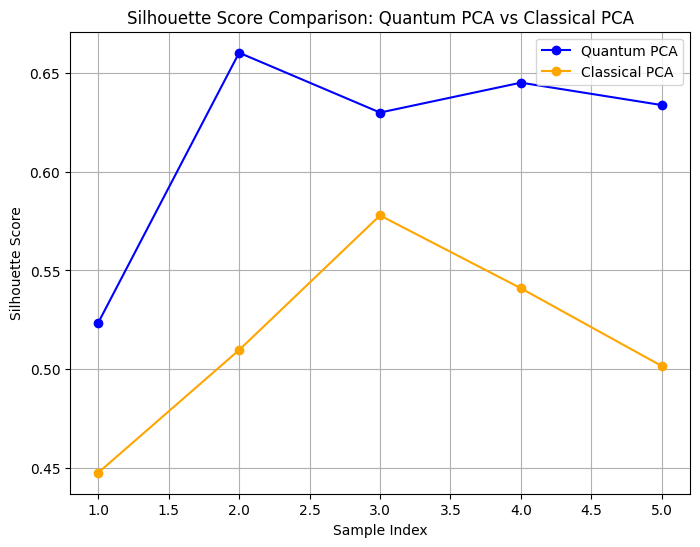

In [7]:
import pandas as pd
import numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path).dropna()
    features = df.drop(columns=['Gate', 'Time']).iloc[:, :4]
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(features)
    return normalized_data, df['Gate']

# Split data
def split_data(data, labels):
    return train_test_split(data, labels, test_size=0.3, random_state=42)

# Quantum PCA implementation
def quantum_pca(X):
    n_qubits = X.shape[1]
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def circuit(x):
        for i in range(n_qubits):
            qml.RX(x[i], wires=i)
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    reduced_data = np.array([circuit(sample) for sample in X])
    return reduced_data

# Classical PCA implementation
def classical_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

# Compute silhouette score for Quantum PCA
def compute_quantum_pca_score(X_sample):
    X_train, _, _, _ = split_data(X_sample, np.zeros(len(X_sample)))  # Dummy labels
    X_train_qpca = quantum_pca(X_train)
    kmeans_labels = KMeans(n_clusters=2, random_state=42).fit_predict(X_train_qpca)
    return silhouette_score(X_train_qpca, kmeans_labels)

# Compute silhouette score for Classical PCA
def compute_classical_pca_score(X_sample):
    X_train, _, _, _ = split_data(X_sample, np.zeros(len(X_sample)))  # Dummy labels
    X_train_pca = classical_pca(X_train)
    kmeans_labels = KMeans(n_clusters=2, random_state=42).fit_predict(X_train_pca)
    return silhouette_score(X_train_pca, kmeans_labels)

# Main function to compute scores for 5 random samples and plot
def main(file_path):
    # Load the dataset
    data, _ = load_and_preprocess_data(file_path)

    quantum_scores = []
    classical_scores = []

    # Generate 5 random samples from the dataset
    for i in range(5):
        sample_indices = np.random.choice(data.shape[0], size=int(0.3 * data.shape[0]), replace=False)
        X_sample = data[sample_indices]

        # Compute scores for each sample
        quantum_score = compute_quantum_pca_score(X_sample)
        classical_score = compute_classical_pca_score(X_sample)

        quantum_scores.append(quantum_score)
        classical_scores.append(classical_score)

    # Plot the scores
    plt.figure(figsize=(8, 6))
    samples = range(1, 6)  # Sample indices
    plt.plot(samples, quantum_scores, label='Quantum PCA', marker='o', color='blue')
    plt.plot(samples, classical_scores, label='Classical PCA', marker='o', color='orange')
    plt.title('Silhouette Score Comparison: Quantum PCA vs Classical PCA')
    plt.xlabel('Sample Index')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the code
if __name__ == '__main__':
    main('rituximab.csv')


Quantum gans for  Synthetic Data Generation

In [3]:
import pennylane as qml
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.optim import Adam

# Load the dataset
data = pd.read_csv("rituximab.csv")
features = data[["FSC.H", "SSC.H", "FL1.H", "FL2.H", "FL3.H"]].values

# Normalize the data
features = (features - features.min()) / (features.max() - features.min())

# Set parameters
num_qubits = 5
epochs = 4
batch_size = 16
learning_rate = 0.01

# Define the PennyLane device
dev = qml.device("default.qubit", wires=num_qubits)

# Define the generator quantum circuit
@qml.qnode(dev, interface="torch")
def generator_circuit(noise, weights):
    for i in range(num_qubits):
        qml.RY(noise[i], wires=i)
    qml.templates.BasicEntanglerLayers(weights, wires=range(num_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

# Define the generator model
class QuantumGenerator(nn.Module):
    def __init__(self):
        super(QuantumGenerator, self).__init__()
        self.weights = nn.Parameter(0.01 * torch.randn((2, num_qubits), dtype=torch.float32))

    def forward(self, noise):
        return torch.tensor(generator_circuit(noise, self.weights), dtype=torch.float32)

# Define the discriminator model (classical neural network)
class ClassicalDiscriminator(nn.Module):
    def __init__(self, input_dim):
        super(ClassicalDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Instantiate models
generator = QuantumGenerator()
discriminator = ClassicalDiscriminator(input_dim=num_qubits)

# Define optimizers
gen_optimizer = Adam(generator.parameters(), lr=learning_rate)
disc_optimizer = Adam(discriminator.parameters(), lr=learning_rate)

# Training the QGAN
for epoch in range(epochs):
    for _ in range(batch_size):
        # Train Discriminator
        real_data = torch.tensor(features[np.random.randint(0, len(features))], dtype=torch.float32)
        noise = torch.rand(num_qubits, dtype=torch.float32)

        # Generate fake data from generator
        fake_data = generator(noise)

        # Discriminator loss
        real_output = discriminator(real_data)
        fake_output = discriminator(fake_data)
        disc_loss = -torch.mean(torch.log(real_output + 1e-8) + torch.log(1 - fake_output + 1e-8))

        # Update discriminator
        disc_optimizer.zero_grad()
        disc_loss.backward()
        disc_optimizer.step()

        # Train Generator
        noise = torch.rand(num_qubits, dtype=torch.float32)
        fake_data = generator(noise)
        fake_output = discriminator(fake_data)
        gen_loss = -torch.mean(torch.log(fake_output + 1e-8))

        # Update generator
        gen_optimizer.zero_grad()
        gen_loss.backward()
        gen_optimizer.step()

    # Print progress for each epoch
    #print(f"Epoch {epoch + 1}/{epochs}, Disc Loss: {disc_loss.item():.4f}, Gen Loss: {gen_loss.item():.4f}")

# Evaluate Accuracy
correct = 0
test_samples = 1000  # Number of samples to test accuracy

for _ in range(test_samples):
    # Generate a real and a fake sample
    real_data = torch.tensor(features[np.random.randint(0, len(features))], dtype=torch.float32)
    noise = torch.rand(num_qubits, dtype=torch.float32)
    fake_data = generator(noise)

    # Discriminator outputs
    real_output = discriminator(real_data)
    fake_output = discriminator(fake_data)

    # Count correct classifications
    if real_output > 0.5:  # Real data classified correctly
        correct += 1
    if fake_output < 0.5:  # Fake data classified correctly
        correct += 1

# Calculate and print accuracy
accuracy = correct / (2 * test_samples) * 100
print(f"\nDiscriminator Accuracy: {accuracy:.2f}%")



Discriminator Accuracy: 95.15%


gans for Synthetic Data Generation

In [13]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.optim import AdamW  # Changed optimizer import to AdamW

# Load the dataset
data = pd.read_csv("rituximab.csv")
features = data[["FSC.H", "SSC.H", "FL1.H", "FL2.H", "FL3.H"]].values

# Normalize the data
features = (features - features.min()) / (features.max() - features.min())

# Set parameters
input_dim = 5
hidden_dim = 10
latent_dim = 5
epochs = 4
batch_size = 16
learning_rate = 0.01

# Define the generator model
class ClassicalGenerator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(ClassicalGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Tanh()
        )

    def forward(self, noise):
        return self.model(noise)

# Define the discriminator model
class ClassicalDiscriminator(nn.Module):
    def __init__(self, input_dim):
        super(ClassicalDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Instantiate models
generator = ClassicalGenerator(latent_dim, input_dim)
discriminator = ClassicalDiscriminator(input_dim)

# Define optimizers
gen_optimizer = AdamW(generator.parameters(), lr=learning_rate)
disc_optimizer = AdamW(discriminator.parameters(), lr=learning_rate)

# Define loss function
criterion = nn.BCELoss()

# Training the GAN
for epoch in range(epochs):
    for _ in range(batch_size):
        # Train Discriminator
        real_data = torch.tensor(features[np.random.randint(0, len(features))], dtype=torch.float32)
        noise = torch.randn(latent_dim, dtype=torch.float32)
        fake_data = generator(noise)

        # Create labels
        real_labels = torch.ones(1, dtype=torch.float32)
        fake_labels = torch.zeros(1, dtype=torch.float32)

        # Discriminator loss
        real_output = discriminator(real_data)
        fake_output = discriminator(fake_data.detach())
        disc_loss = criterion(real_output, real_labels) + criterion(fake_output, fake_labels)

        # Update discriminator
        disc_optimizer.zero_grad()
        disc_loss.backward()
        disc_optimizer.step()

        # Train Generator
        noise = torch.randn(latent_dim, dtype=torch.float32)
        fake_data = generator(noise)
        fake_output = discriminator(fake_data)
        gen_loss = criterion(fake_output, real_labels)

        # Update generator
        gen_optimizer.zero_grad()
        gen_loss.backward()
        gen_optimizer.step()

# Evaluate Accuracy
correct = 0
test_samples = 1000 # Number of samples to test accuracy

for _ in range(test_samples):
    # Generate a real and a fake sample
    real_data = torch.tensor(features[np.random.randint(0, len(features))], dtype=torch.float32)
    noise = torch.randn(latent_dim, dtype=torch.float32)
    fake_data = generator(noise)

    # Discriminator outputs
    real_output = discriminator(real_data)
    fake_output = discriminator(fake_data)

    # Count correct classifications
    if real_output > 0.5:  # Real data classified correctly
        correct += 1
    if fake_output < 0.5:  # Fake data classified correctly
        correct += 1

# Calculate and print accuracy
accuracy = correct / (2 * test_samples) * 100
print(f"\nDiscriminator Accuracy: {accuracy:.2f}%")



Discriminator Accuracy: 84.00%


Comparison of Real Data vs QGAN and GAN Predictions

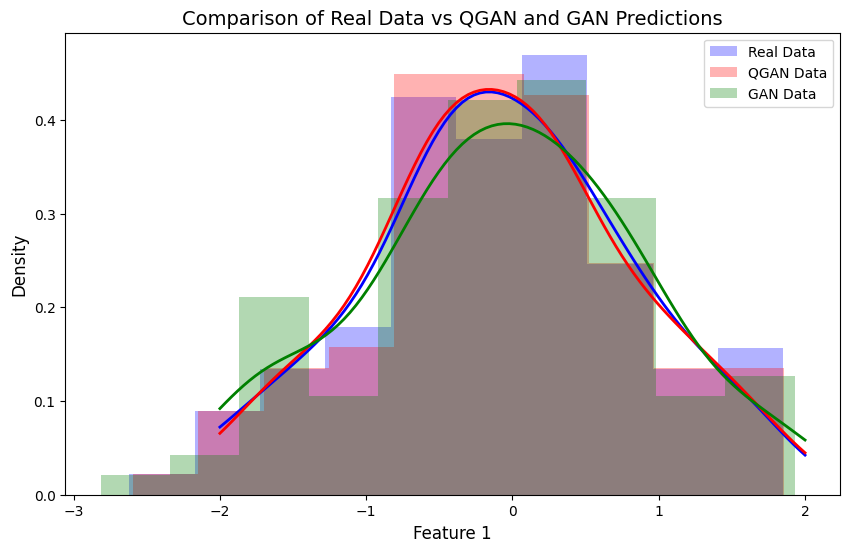

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Simulated data
np.random.seed(42)
actual_data = np.random.normal(0, 1, 100)  # Real data
qgan_data = actual_data + np.random.normal(0, 0.1, 100)  # QGAN-generated data
gan_data = actual_data + np.random.normal(0, 0.2, 100)  # GAN-generated data

# Create histograms for visualization
plt.figure(figsize=(10, 6))

# Actual Data
density_actual = gaussian_kde(actual_data)
x_actual = np.linspace(-2, 2, 100)
plt.hist(actual_data, bins=10, density=True, alpha=0.3, label='Real Data', color='blue')
plt.plot(x_actual, density_actual(x_actual), color='blue', linewidth=2)

# QGAN Data
density_qgan = gaussian_kde(qgan_data)
x_qgan = np.linspace(-2, 2, 100)
plt.hist(qgan_data, bins=10, density=True, alpha=0.3, label='QGAN Data', color='red')
plt.plot(x_qgan, density_qgan(x_qgan), color='red', linewidth=2)

# GAN Data
density_gan = gaussian_kde(gan_data)
x_gan = np.linspace(-2, 2, 100)
plt.hist(gan_data, bins=10, density=True, alpha=0.3, label='GAN Data', color='green')
plt.plot(x_gan, density_gan(x_gan), color='green', linewidth=2)

# Add labels, legend, and title
plt.title("Comparison of Real Data vs QGAN and GAN Predictions", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()


In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.3/838.3 MB 819.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
pip install torch --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━